In [1]:
import os
import math
import time
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import sklearn.ensemble as ske
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,f1_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


C:\Users\sumit\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
In C:\Users\sumit\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sumit\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sumit\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will b

In [2]:
def sensor_emotion_signal(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    if ymap != None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)


In [3]:
data = pd.read_csv('./EEG-Brainwave-Sensor-Dataset/final_data_eegsleep.csv', sep=',')

In [4]:
data.head(10)

,Unnamed: 0,F5,F6,F8,F9,F10,F11,F15,F16,F17,...,F66,F69,F70,F71,F72,F73,F77,F80,F85,Class
0,0,1.000000,0.619948,0.619946,0.760204,0.620021,0.760235,1.000000,1.000000,1.000000,...,0.760608,0.760230,1.000000,0.760342,1.000000,0.760374,0.760201,0.620375,11.9565,0
1,1,0.760206,0.760194,1.000000,0.760197,1.000000,0.760200,0.760197,0.760198,0.760201,...,0.760266,0.760316,0.760276,0.760270,0.760305,0.760261,0.760219,0.760298,0.1160,0
2,2,1.000000,1.000000,1.000000,1.000000,0.760192,1.000000,0.760211,1.000000,0.760188,...,1.000000,1.000000,0.620498,1.000000,1.000000,0.620082,1.000000,1.000000,26.6158,0
3,3,0.760199,0.760200,0.620025,0.760199,0.760198,1.000000,0.760205,1.000000,0.760204,...,0.760391,0.760230,0.760248,0.760188,1.000000,0.760339,0.760261,1.000000,5.0380,0
4,4,1.000000,1.000000,0.619962,1.000000,0.760207,1.000000,0.760189,0.760198,1.000000,...,0.760250,1.000000,1.000000,0.760206,1.000000,1.000000,1.000000,0.760211,17.3036,0
5,5,0.760194,0.619928,1.000000,0.760283,0.760202,0.619953,1.000000,1.000000,1.000000,...,0.760277,0.760290,1.000000,0.760188,1.000000,0.760260,1.000000,1.000000,14.3872,0
6,6,1.000000,1.000000,0.760199,0.760197,1.000000,1.000000,0.760191,0.760193,0.760201,...,0.619965,1.000000,1.000000,1.000000,0.760310,0.760337,1.000000,0.760281,17.0178,1
7,7,0.760240,0.760204,0.760191,1.000000,0.760188,0.760200,0.760192,1.000000,0.760274,...,0.760207,0.760208,0.760488,1.000000,0.760276,0.760209,0.760215,1.000000,3.0895,2
8,8,0.760243,1.000000,0.760188,0.619972,0.761439,1.000000,1.000000,1.000000,0.760188,...,1.000000,0.760238,1.000000,0.760225,0.760217,1.000000,0.760345,1.000000,8.6038,3
9,9,1.000000,0.760196,0.619940,0.760194,0.760192,1.000000,0.619961,0.760195,0.760229,...,0.760311,1.000000,0.761586,0.760194,1.000000,0.760230,0.760246,0.760264,18.0021,1


In [5]:
rows_count, columns_count = data.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 216
Total Number of columns : 43


In [6]:
data.dtypes

Unnamed: 0      int64
F5            float64
F6            float64
F8            float64
F9            float64
F10           float64
F11           float64
F15           float64
F16           float64
F17           float64
F18           float64
F23           float64
F24           float64
F31           float64
F34           float64
F36           float64
F39           float64
F41           float64
F43           float64
F45           float64
F46           float64
F47           float64
F48           float64
F50           float64
F51           float64
F53           float64
F54           float64
F55           float64
F56           float64
F61           float64
F62           float64
F64           float64
F65           float64
F66           float64
F69           float64
F70           float64
F71           float64
F72           float64
F73           float64
F77           float64
F80           float64
F85           float64
Class           int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  216 non-null    int64  
 1   F5          216 non-null    float64
 2   F6          216 non-null    float64
 3   F8          216 non-null    float64
 4   F9          216 non-null    float64
 5   F10         216 non-null    float64
 6   F11         216 non-null    float64
 7   F15         216 non-null    float64
 8   F16         216 non-null    float64
 9   F17         216 non-null    float64
 10  F18         216 non-null    float64
 11  F23         216 non-null    float64
 12  F24         216 non-null    float64
 13  F31         216 non-null    float64
 14  F34         216 non-null    float64
 15  F36         216 non-null    float64
 16  F39         216 non-null    float64
 17  F41         216 non-null    float64
 18  F43         216 non-null    float64
 19  F45         216 non-null    f

In [8]:
data.isnull().sum() 

Unnamed: 0    0
F5            0
F6            0
F8            0
F9            0
F10           0
F11           0
F15           0
F16           0
F17           0
F18           0
F23           0
F24           0
F31           0
F34           0
F36           0
F39           0
F41           0
F43           0
F45           0
F46           0
F47           0
F48           0
F50           0
F51           0
F53           0
F54           0
F55           0
F56           0
F61           0
F62           0
F64           0
F65           0
F66           0
F69           0
F70           0
F71           0
F72           0
F73           0
F77           0
F80           0
F85           0
Class         0
dtype: int64

In [9]:
#percentage of missing values for each column:
data.isna().sum()/len(data)*100

Unnamed: 0    0.0
F5            0.0
F6            0.0
F8            0.0
F9            0.0
F10           0.0
F11           0.0
F15           0.0
F16           0.0
F17           0.0
F18           0.0
F23           0.0
F24           0.0
F31           0.0
F34           0.0
F36           0.0
F39           0.0
F41           0.0
F43           0.0
F45           0.0
F46           0.0
F47           0.0
F48           0.0
F50           0.0
F51           0.0
F53           0.0
F54           0.0
F55           0.0
F56           0.0
F61           0.0
F62           0.0
F64           0.0
F65           0.0
F66           0.0
F69           0.0
F70           0.0
F71           0.0
F72           0.0
F73           0.0
F77           0.0
F80           0.0
F85           0.0
Class         0.0
dtype: float64

In [10]:
def missing_values_table(df):
        #Total missing values
        mis_val = df.isnull().sum()
        
        #Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        #Print some summary information
        print ("selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        #Return the dataframe with missing information
        return mis_val_table_ren_columns


In [11]:
train_missing= missing_values_table(data)
train_missing

selected dataframe has 43 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<AxesSubplot:>

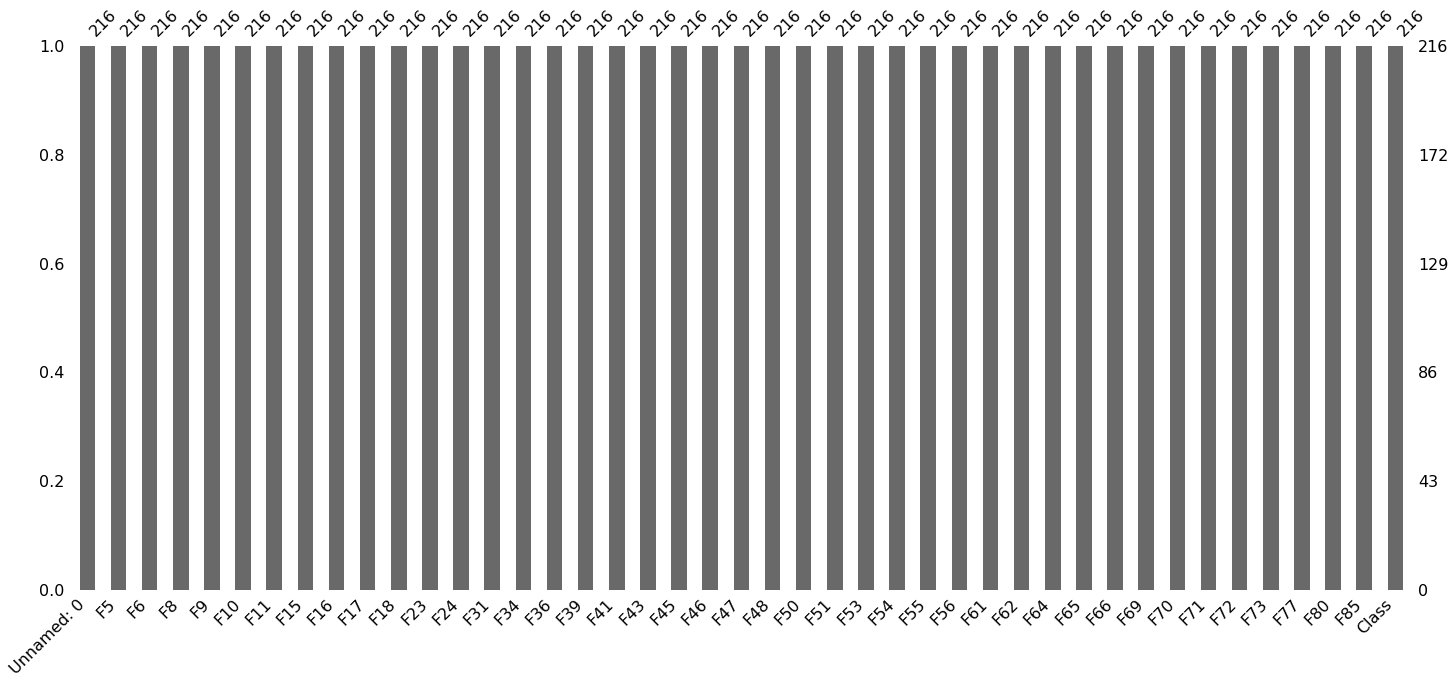

In [12]:
msno.bar(data)

In [13]:
data.isna().sum()/len(data)*100

Unnamed: 0    0.0
F5            0.0
F6            0.0
F8            0.0
F9            0.0
F10           0.0
F11           0.0
F15           0.0
F16           0.0
F17           0.0
F18           0.0
F23           0.0
F24           0.0
F31           0.0
F34           0.0
F36           0.0
F39           0.0
F41           0.0
F43           0.0
F45           0.0
F46           0.0
F47           0.0
F48           0.0
F50           0.0
F51           0.0
F53           0.0
F54           0.0
F55           0.0
F56           0.0
F61           0.0
F62           0.0
F64           0.0
F65           0.0
F66           0.0
F69           0.0
F70           0.0
F71           0.0
F72           0.0
F73           0.0
F77           0.0
F80           0.0
F85           0.0
Class         0.0
dtype: float64

In [14]:
data.isnull().values.any()

False

In [15]:
data.nunique()

Unnamed: 0    216
F5             49
F6             50
F8             54
F9             63
F10            55
F11            50
F15            55
F16            54
F17            54
F18            47
F23            54
F24            56
F31            53
F34            48
F36            55
F39            52
F41            62
F43            52
F45            56
F46            57
F47            55
F48            54
F50            53
F51            56
F53            48
F54            55
F55            58
F56            52
F61            52
F62            57
F64            50
F65            51
F66            52
F69            50
F70            55
F71            57
F72            55
F73            54
F77            53
F80            51
F85            71
Class           4
dtype: int64

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,216.0,107.500000,62.498000,0.000000,53.750000,107.500000,161.250000,215.000000
F5,216.0,0.942036,0.093319,0.620000,0.950790,0.983478,1.000000,1.000000
F6,216.0,0.928649,0.111186,0.619928,0.933518,0.982476,1.000000,1.000000
F8,216.0,0.906355,0.127754,0.619940,0.760247,0.978895,0.999097,1.000000
F9,216.0,0.879594,0.134606,0.619900,0.760200,0.965825,0.990696,1.000000
F10,216.0,0.915501,0.110944,0.619936,0.768438,0.968725,0.998210,1.000000
F11,216.0,0.930592,0.103861,0.619953,0.946595,0.979284,1.000000,1.000000
F15,216.0,0.912269,0.116835,0.619961,0.760803,0.973738,0.994286,1.000000
F16,216.0,0.911946,0.119112,0.619922,0.760416,0.979298,0.995061,1.000000
F17,216.0,0.910240,0.126181,0.532406,0.760353,0.983380,0.999856,1.000000


In [17]:
data_transpose = data.describe().T
data_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
Unnamed: 0,0.000000,53.750000,107.500000,161.250000,215.000000
F5,0.620000,0.950790,0.983478,1.000000,1.000000
F6,0.619928,0.933518,0.982476,1.000000,1.000000
F8,0.619940,0.760247,0.978895,0.999097,1.000000
F9,0.619900,0.760200,0.965825,0.990696,1.000000
F10,0.619936,0.768438,0.968725,0.998210,1.000000
F11,0.619953,0.946595,0.979284,1.000000,1.000000
F15,0.619961,0.760803,0.973738,0.994286,1.000000
F16,0.619922,0.760416,0.979298,0.995061,1.000000
F17,0.532406,0.760353,0.983380,0.999856,1.000000


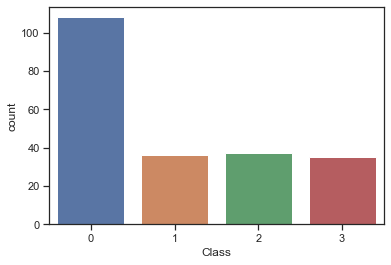

In [18]:
sns.set(style="ticks")
f = sns.countplot(x="Class", data=data)
plt.show()

In [19]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [27]:
data.columns

Index(['Unnamed: 0', 'F5', 'F6', 'F8', 'F9', 'F10', 'F11', 'F15', 'F16', 'F17',
       'F18', 'F23', 'F24', 'F31', 'F34', 'F36', 'F39', 'F41', 'F43', 'F45',
       'F46', 'F47', 'F48', 'F50', 'F51', 'F53', 'F54', 'F55', 'F56', 'F61',
       'F62', 'F64', 'F65', 'F66', 'F69', 'F70', 'F71', 'F72', 'F73', 'F77',
       'F80', 'F85', 'Class'],
      dtype='object')

In [28]:
X = data.drop(columns=['Unnamed: 0','Class'])
y = data['Class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

enc = LabelEncoder()
y = enc.fit_transform(y)


In [21]:
# X = data.drop('Label', axis=1)
# y = data['Label']

In [29]:
X

array([[ 0.62258189, -2.78290111, -2.24707511, ..., -1.68602231,
        -2.77166249, -0.10335178],
       [-1.95301076, -1.5186002 ,  0.73471299, ..., -1.6858458 ,
        -1.51792965, -1.35218049],
       [ 0.62258189,  0.64322043,  0.73471299, ...,  0.63803008,
         0.62983003,  1.44277842],
       ...,
       [ 0.25497686,  0.15459677,  0.48270111, ...,  0.55956635,
         0.61664968, -0.88999627],
       [ 0.33926018,  0.47038745,  0.50656774, ...,  0.55140597,
         0.38728823, -1.23969573],
       [ 0.36300816,  0.26264893,  0.48029247, ...,  0.43258614,
         0.45127253, -1.21697729]])

In [30]:
y

array([0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2,
       3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0,
       1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0,
       0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0,
       0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3,
       0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1,
       2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2,
       3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0,
       1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3], dtype=int64)

In [31]:
from sklearn import svm

Testing  key  feature:
Algorithm Test:
RF : 95.384615 %
AB : 80.000000 %
GNB : 38.461538 %
MLP : 69.230769 %
DT : 95.384615 %
LR : 80.000000 %

Best algorithm is RF with a 95.384615 % success


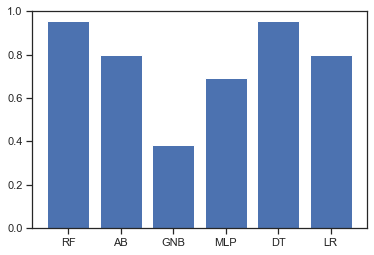

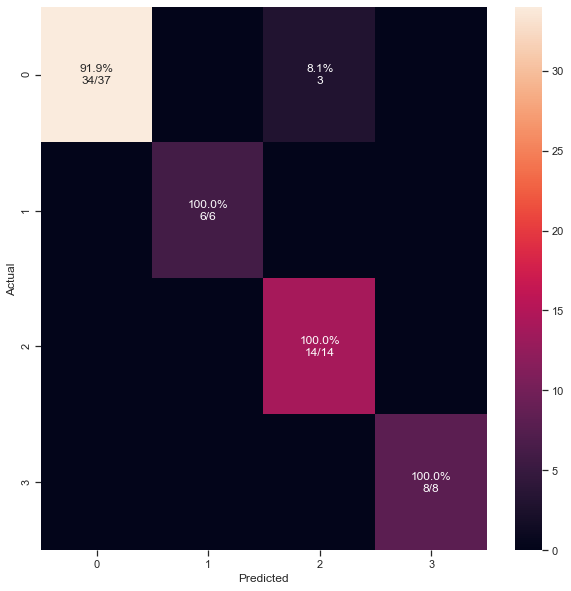

F1 Score is  : 96.524307 %
Confusion Matrix
[[34  0  3  0]
 [ 0  6  0  0]
 [ 0  0 14  0]
 [ 0  0  0  8]]
False positive rate : 0.000000 %
False negative rate : 0.000000 %

Winner algorithm is RF with a 95.384615 % success
False positive rate : 0.000000 %
False negative rate : 0.000000 %


In [32]:
print('Testing  key  feature:')
fsel = ske.ExtraTreesClassifier().fit(X, y)
model = SelectFromModel(fsel, prefit=True)
X_new = model.transform(X)
nb_features = X_new.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
features = []
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
a =np.argsort(fsel.feature_importances_)[::-1][:nb_features]
for f in sorted(np.argsort(fsel.feature_importances_)[::-1][:nb_features]):
    features.append(data.columns[f])

'''
Train Models:
(alg1=Random Forest, alg2=AdaBoost, alg3=Gausian Naive Bayes, alg4=MLP, alg5=Decision Tree, alg6=Support Vector Machine, 
alg7=Logistic Reggression)

'''   
algorithms = {
        "RF": ske.RandomForestClassifier(n_estimators=10),
        "AB": ske.AdaBoostClassifier(n_estimators=10),
        "GNB": GaussianNB(),
        "MLP": MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
        "DT": DecisionTreeClassifier(),
        #"SVM": SVC(kernel='rbf'),
        "LR": LogisticRegression()
    }

results = {}
print("Algorithm Test:")
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    results[algo] = score
D=results
plt.figure();
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
bestAlgo = max(results, key=results.get)
print('\nBest algorithm is %s with a %f %% success' % (bestAlgo, results[bestAlgo]*100))
clf = algorithms[bestAlgo]
res = clf.predict(X_test)
mt = confusion_matrix(y_test, res)
sensor_emotion_signal(y_test, res,clf.classes_)
FS=f1_score(y_test, res, average='macro')
plt.show()
print ('F1 Score is  : %f %%'% (FS*100))
print ('Confusion Matrix')
print (mt)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))
clf = algorithms[winner]
res = clf.predict(X_test)
mt = confusion_matrix(y_test, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

In [33]:
joblib.dump(clf,'Best_Model_final.pkl')

['Best_Model_final.pkl']